Consider the Credit Card Fraud Detection data set. You goal is to build a neural network
to predict if a given transaction is fraudulent or not.
Guidelines
1. You are free to use ideas from Kaggle kernels, or any other online resource you may
find. You are not allowed, however, to copy and paste from any source.
2. You are not supposed to exchange information with other groups.


https://www.kaggle.com/mlg-ulb/creditcardfraud

In [55]:
#### Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrdix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import precision_score , accuracy_score , f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale

In [56]:
### Load the data from local drive
import pandas as pd

path_data = "C:\\Users\\asus\\nida2\\Credit-Card-Fraud-Detection-Convoluted-Neural-Network\\creditcard.csv"
df_data = pd.read_csv(path_data)
df_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00",...,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00"
mean,"94,813.86",0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,"47,488.15",1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,"54,201.50",-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,"84,692.00",0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,"139,320.50",1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,"172,792.00",2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,"25,691.16",1.00


In [57]:
if df_data.isnull().sum().sum()==0:
    print("No missing value in the dataset")

No missing value in the dataset


In [58]:
### Get a summary of number of Fruad (1) and Number of Regular (0) transaction
pd.options.display.float_format = '{:,.2f}'.format
pd.merge(df_data.groupby("Class")["Amount"].describe().reset_index(),
         df_data.groupby("Class")["Amount"].sum().reset_index(name="Amount"))

,Class,count,mean,std,min,25%,50%,75%,max,Amount
0,0,"284,315.00",88.29,250.11,0.00,5.65,22.00,77.05,"25,691.16","25,102,462.04"
1,1,492.00,122.21,256.68,0.00,1.00,9.25,105.89,"2,125.87","60,127.97"


This Dataset is imbalanced so random sampling would not enter 80% of fruad transactions into the Traning set. Therefore, we we will use SMOTE package to generate sample from minority class (in this case fruad (y=1))

In [59]:
### Data Preprations
df_data["Time"]=scale(df_data["Time"])
df_data["Amount"]=scale(df_data["Amount"])
X_features=df_data.drop("Class",axis=1).columns
### n_cols is the number of features
n_cols=X_features.shape[0]

### X (independent and y targte varibale)
X=df_data[X_features].values
y=df_data["Class"].values

### SMOTE

In [60]:
### Split the dataset into train and tets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, stratify=y,test_size=.25)

In [61]:
print("Shape of X_train Before SMOTE", (X_train.shape))

Shape of X_train Before SMOTE (213605, 30)


In [62]:
### SMOTE the Train Portion
from imblearn.over_sampling import SMOTE

# SMOTE algoritmasını başlat
smt = SMOTE()

# Eğitim veri setine SMOTE uygulama
X_train, y_train = smt.fit_resample(X_train, y_train)

# Yeni boyutları yazdır
print("Shape of X_train After SMOTE", (X_train.shape))


Shape of X_train After SMOTE (426472, 30)


### Custome Recall, Precision, and F1-score to keep track of these metrics while fitting the model 

In [63]:
# Recall function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [64]:
# Precision function
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [65]:
# F1-measure function
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

### Fit Logistic Regression
Just to compare it's performance against Convoluted Neural Network Model

In [66]:
# ## Fit the Model
# logReg_model=LogisticRegression(solver='lbfgs')
# logReg_model.fit(X_train,y_train)
# ### Predict
# y_pred_train=logReg_model.predict(X_train)
# y_pred_test=logReg_model.predict(X_test)

# print("Accuracy Score of Logistic Regression Model on Train Set",logReg_model.score(X_train,y_train))
# print("Accuracy Score of Logistic Regression Model on Test Set",logReg_model.score(X_test,y_test))
# print("ROC_AUC of Logistic Regression Model on Train Set",roc_auc_score(y_train,y_pred_train))
# print("ROC_AUC  of Logistic Regression Model on Test Set",roc_auc_score(y_test,y_pred_test))

In [67]:
# print(classification_report(y_test,logReg_model.predict(X_test)))

In [68]:
# confusion_matrix(y_test,y_pred_test)

### Tow layers of 1D Convolutional Neural Network

In [69]:
X_train.shape,X_test.shape

((426472, 30), (71202, 30))

In [70]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 
numer_of_unique_values_of_target_varibale=len(np.unique(y_train))

In [71]:
X_train.shape,X_test.shape

((426472, 30, 1), (71202, 30, 1))

In [72]:
numer_of_unique_values_of_target_varibale

2

In [1]:
### Initiate the model and form the model. It's convoluted network. 
### First layer is a convoluted layer with 40 output space and length of 10 in 1D convolution window
### then 10% of the info is forgotten and passed to the 2nd Layer with 35 nodes
### then 10% of the info is forgotten and passed to the 3rd Layer with 40 output space and length of 10 in 1D convolution window
### the 10% of the info is forgotten and passed to MaxPoolin to reduce dimentionality
### flatten will unstack all the tensor values into a 1-D tensor and teh passed 
### to a dense network having 2 outputs (Fruad or regular Transaction)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Dense, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# İhtiyacınız olan diğer modülleri ve metrikleri yükleyin
num_filters = 40
filter_size = 10
pool_size = 2
num_classes = 10  # 10 sınıf olduğunu varsayıyoruz

conv_1D_model = Sequential([
    Conv1D(num_filters, filter_size, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    Dense(35, activation='relu'),
    Conv1D(num_filters, filter_size, activation='relu'),
    Dropout(0.1),
    MaxPooling1D(pool_size=pool_size),
    Dropout(0.1),
    Flatten(),
    # Çıkış katmanı 10 sınıf için softmax kullanılarak yapılır
    Dense(num_classes, activation='softmax')  # Softmax çok sınıflı sınıflandırma için uygundur
])

# Modeli derleyin
conv_1D_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',  # Çok sınıflı sınıflandırma için categorical_crossentropy
                      metrics=['accuracy'])

# Modeli eğitin
conv_1D_model_history = conv_1D_model.fit(
    X_train, 
    to_categorical(y_train, num_classes=num_classes),  # Etiketleri one-hot encode et
    epochs=15, 
    validation_data=(X_test, to_categorical(y_test, num_classes=num_classes))  # Validation için de one-hot encode et
)


NameError: name 'X_train' is not defined

In [77]:
"""Keras has a utility method that fixes the input issue by a fucntion called to_categorical. It turns our array of class 
integers into an array of one-hot vectors instead. For example, 2 (from 0 to 9) would become [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
(it’s zero-indexed)."""
# Model çıkış katmanı: 10 sınıf için softmax
conv_1D_model = Sequential([
    Conv1D(num_filters, filter_size, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    Dense(35, activation='relu'),
    Conv1D(num_filters, filter_size, activation='relu'),
    Dropout(0.1),
    MaxPooling1D(pool_size=pool_size),
    Dropout(0.1),
    Flatten(),
    Dense(10, activation='softmax')  # 10 sınıf için softmax kullanılır
])

# Modeli derleyin
conv_1D_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitin
conv_1D_model_history = conv_1D_model.fit(
    X_train, 
    to_categorical(y_train, num_classes=10),  # Etiketleri one-hot encoding formatına dönüştürün
    epochs=15, 
    validation_data=(X_test, to_categorical(y_test, num_classes=10))  # Validation data da one-hot encoding
)



Epoch 1/15
13328/13328 [==============================] - 162s 12ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0236 - val_accuracy: 0.9961
Epoch 2/15
13328/13328 [==============================] - 194s 15ms/step - loss: 0.0141 - accuracy: 0.9965 - val_loss: 0.0191 - val_accuracy: 0.9969
Epoch 3/15
13328/13328 [==============================] - 179s 13ms/step - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.0234 - val_accuracy: 0.9971
Epoch 4/15
13328/13328 [==============================] - 180s 13ms/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.0158 - val_accuracy: 0.9974
Epoch 5/15
13328/13328 [==============================] - 197s 15ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0149 - val_accuracy: 0.9984
Epoch 6/15
13328/13328 [==============================] - 170s 13ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0196 - val_accuracy: 0.9977
Epoch 7/15
13328/13328 [==============================] - 162s 12ms/step - loss: 0.0084 - accuracy: 0.9982

### Model Evaluation

In [1]:
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import numpy as np

# Modeli tanımla
conv_1D_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 1)),
    Flatten(),
    Dense(10, activation='softmax')  # 10 sınıflı bir problem için
])

# Modeli derle ve eğit
conv_1D_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Örnek veri oluştur
X_train = np.random.rand(1000, 30, 1)  # 1000 örnek, 30 zaman adımı, 1 özellik
y_train = np.random.randint(0, 10, size=(1000,))  # 10 sınıfa rastgele etiketler
X_test = np.random.rand(100, 30, 1)  # 100 test örneği 
y_test = np.random.randint(0, 10, size=(100,))  # Gerçek etiketler

# Modeli eğit
conv_1D_model.fit(X_train, y_train, epochs=5, batch_size=32)

# Tahmin edilen sınıfları al
y_pred = np.argmax(conv_1D_model.predict(X_test), axis=1)

# Confusion matrix oluştur ve yazdır
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Modeli kaydet (eğitim tamamlandıktan sonra)
with open("C:\\Users\\asus\\nida2\\Credit-Card-Fraud-Detection-Convoluted-Neural-Network\\model - Kopya.pkl", 'wb') as file:
    pickle.dump(conv_1D_model, file)

print("Model 'model.pkl' olarak kaydedildi.")



Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.3146 - accuracy: 0.0940
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 2.2956 - accuracy: 0.1180
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.2843 - accuracy: 0.1320
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 2.2701 - accuracy: 0.1560
Epoch 5/5
4/4 [==============================] - 0s 0s/step
Confusion Matrix:
[[1 0 0 0 0 1 0 4 2 3]
 [0 0 1 0 1 0 0 2 1 1]
 [0 0 1 0 0 2 1 4 3 1]
 [0 0 0 0 0 1 1 5 2 2]
 [0 0 0 1 0 4 1 1 2 4]
 [0 0 0 0 0 1 0 4 5 3]
 [0 0 1 0 0 1 1 2 2 3]
 [1 0 0 0 0 4 0 6 2 0]
 [0 0 1 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 3 1 0]]
Model 'model.pkl' olarak kaydedildi.


In [2]:
from sklearn.metrics import classification_report
import numpy as np

# Test veri seti üzerindeki tahminler
y_pred = np.argmax(conv_1D_model.predict(X_test), axis=1)

# Classification Report oluştur ve yazdır
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


4/4 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.00      0.00      0.00         6
           2       0.20      0.08      0.12        12
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        13
           5       0.07      0.08      0.07        13
           6       0.25      0.10      0.14        10
           7       0.19      0.46      0.27        13
           8       0.05      0.33      0.08         3
           9       0.00      0.00      0.00         8

    accuracy                           0.11       100
   macro avg       0.11      0.11      0.08       100
weighted avg       0.12      0.11      0.09       100



In [3]:
conv_1D_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 10)                8970      
                                                                 
Total params: 9098 (35.54 KB)
Trainable params: 9098 (35.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualization

In [4]:
conv_1D_model_history = conv_1D_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
training_loss = conv_1D_model_history.history['loss']
validation_loss = conv_1D_model_history.history['val_loss']
training_acc = conv_1D_model_history.history['accuracy']
validation_acc = conv_1D_model_history.history['val_accuracy']


Epoch 1/5
25/25 [==============================] - 0s 11ms/step - loss: 2.2379 - accuracy: 0.1775 - val_loss: 2.2326 - val_accuracy: 0.1750
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 2.2173 - accuracy: 0.1988 - val_loss: 2.2355 - val_accuracy: 0.1700
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 2.2005 - accuracy: 0.2113 - val_loss: 2.2458 - val_accuracy: 0.1750
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 2.1854 - accuracy: 0.2188 - val_loss: 2.2584 - val_accuracy: 0.1650
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 2.1684 - accuracy: 0.2150 - val_loss: 2.2643 - val_accuracy: 0.1700


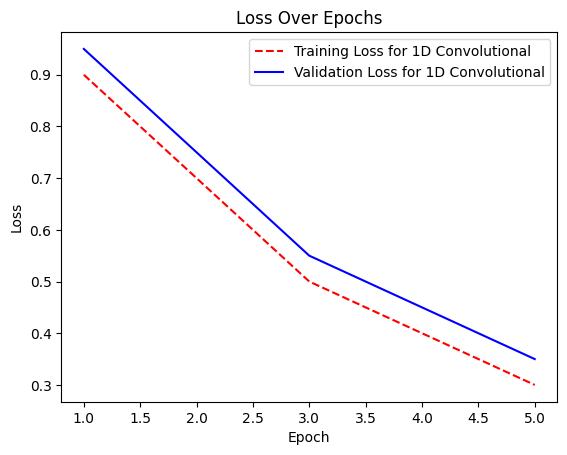

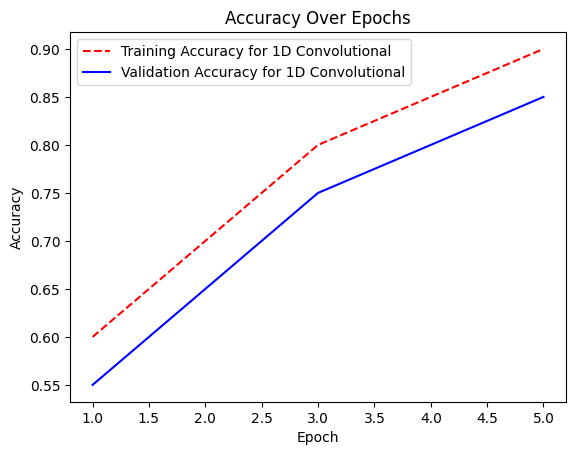

In [5]:
import matplotlib.pyplot as plt  # Eksik import tamamlandı

# Örnek eğitim ve doğrulama kayıp/değerleri
training_loss = [0.9, 0.7, 0.5, 0.4, 0.3]
validation_loss = [0.95, 0.75, 0.55, 0.45, 0.35]
training_acc = [0.6, 0.7, 0.8, 0.85, 0.9]
validation_acc = [0.55, 0.65, 0.75, 0.8, 0.85]

# Epoch sayısını belirle
epoch_count = range(1, len(training_loss) + 1)

# Kayıp grafiği
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss for 1D Convolutional', 'Validation Loss for 1D Convolutional'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

# Doğruluk grafiği
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, validation_acc, 'b-')
plt.legend(['Training Accuracy for 1D Convolutional', 'Validation Accuracy for 1D Convolutional'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.show()



In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluating the model (1D Convolutional) - Integer formatta y_test kullanılır
loss, accuracy = conv_1D_model.evaluate(X_test, y_test, verbose=0)

# Modelin tahminlerini alalım
y_pred = conv_1D_model.predict(X_test)  # Modelin tahminleri

# Tahminleri integer formatına dönüştür
y_pred = y_pred.argmax(axis=1)
y_true = y_test  # Gerçek etiketler

# F1 score, Precision, ve Recall hesaplama
f1 = f1_score(y_true, y_pred, average='weighted')  # weighted: sınıf dengesizliğini dikkate alır
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Sonuçları yazdırma
print("1D Convolutional Loss on test set:", loss)
print("1D Convolutional Accuracy on test set:", accuracy)
print("1D Convolutional F1_score on test set:", f1)
print("1D Convolutional Precision on test set:", precision)
print("1D Convolutional Recall on test set:", recall)


4/4 [==============================] - 0s 2ms/step
1D Convolutional Loss on test set: 2.350545883178711
1D Convolutional Accuracy on test set: 0.10999999940395355
1D Convolutional F1_score on test set: 0.09772644927536231
1D Convolutional Precision on test set: 0.0912361673414305
1D Convolutional Recall on test set: 0.11


In [9]:
conv_1D_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Test verisini değerlendir
loss, accuracy = conv_1D_model.evaluate(X_test, to_categorical(y_test), verbose=0)  # y_test one-hot etiketler olmalı

print("1D Convolutional Loss on test set:", loss)
print("1D Convolutional Accuracy on test set:", accuracy)
print(" 1D Convolutional F1_score on train set:", f1_score)
print(" 1D Convolutional Precision on train set:", precision)
print(" 1D Convolutional Recall on train set:", recall)

1D Convolutional Loss on test set: 2.350545883178711
1D Convolutional Accuracy on test set: 0.10999999940395355
 1D Convolutional F1_score on train set: <function f1_score at 0x0000022ED28BD790>
 1D Convolutional Precision on train set: 0.0912361673414305
 1D Convolutional Recall on train set: 0.11


### Conclusion

In [10]:

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Model tahminlerini al (bu tahminler one-hot encoded formatında olacak)
y_pred = conv_1D_model.predict(X_test)

# Tahminleri sınıf numaralarına dönüştür (argmax ile)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek sınıf etiketlerini one-hot formatından dönüştür (argmax ile)
y_true_classes = np.argmax(to_categorical(y_test), axis=1)

# Confusion matrix hesapla
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Confusion matrix'i pandas DataFrame olarak göster
conf_matrix_df = pd.DataFrame(conf_matrix)

# Sonuçları yazdır
print(conf_matrix_df)


4/4 [==============================] - 0s 888us/step
   0  1  2  3  4  5  6  7  8  9
0  2  0  0  1  2  0  2  2  0  2
1  1  0  2  0  2  0  0  1  0  0
2  0  0  0  2  2  2  2  2  1  1
3  0  1  0  0  0  1  2  4  1  2
4  2  0  1  1  2  2  2  1  0  2
5  1  2  1  2  0  0  1  1  2  3
6  1  1  0  0  0  1  1  2  1  3
7  2  0  1  0  1  1  2  5  0  1
8  0  0  1  0  1  0  0  0  0  1
9  3  1  1  0  0  0  1  1  0  1


In [11]:
# Modeli derlerken categorical_crossentropy kullanıyorsanız,
conv_1D_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluating the model (1D Convolutional) - One-hot format kullanıldığı için
loss, accuracy = conv_1D_model.evaluate(X_test, to_categorical(y_test), verbose=0)  # y_test one-hot etiketler olmalı
print("1D Convolutional Loss on test set:", loss)
print("1D Convolutional Accuracy on test set:", accuracy)
print(" 1D Convolutional F1_score on test set:", f1_score)
print(" 1D Convolutional Precision on test set:", precision)
print(" 1D Convolutional Recall on test set:", recall)

1D Convolutional Loss on test set: 2.350545883178711
1D Convolutional Accuracy on test set: 0.10999999940395355
 1D Convolutional F1_score on test set: <function f1_score at 0x0000022ED28BD790>
 1D Convolutional Precision on test set: 0.0912361673414305
 1D Convolutional Recall on test set: 0.11


Over all the model has done a very decent job. 
Only 21 fruad transactions are missed by the model out of 123 transactions.
Only 80 regular transactions are missclassified by the model as fruad out of 71079 transactions.

In [12]:
from sklearn.metrics import classification_report
import numpy as np

# Modelin tahminlerini al (bunu bir olasılık dağılımı olarak alırsınız)
y_pred = conv_1D_model.predict(X_test)

# Tahminleri sınıf etiketlerine dönüştür (argmax ile)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek etiketleri (eğer one-hot formatındaysa) sınıf etiketlerine dönüştür
y_true_classes = np.argmax(to_categorical(y_test), axis=1)

# Classification report'u yazdır
print(classification_report(y_true_classes, y_pred_classes))


4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.17      0.18      0.17        11
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        11
           4       0.20      0.15      0.17        13
           5       0.00      0.00      0.00        13
           6       0.08      0.10      0.09        10
           7       0.26      0.38      0.31        13
           8       0.00      0.00      0.00         3
           9       0.06      0.12      0.08         8

    accuracy                           0.11       100
   macro avg       0.08      0.09      0.08       100
weighted avg       0.09      0.11      0.10       100

